In [1]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('../Retail_trade_Poland_2000-2020.csv', index_col = [0], parse_dates = [0])

In [4]:
data.columns = ['Indeks 2015 - 100']

<Axes: xlabel='DATE'>

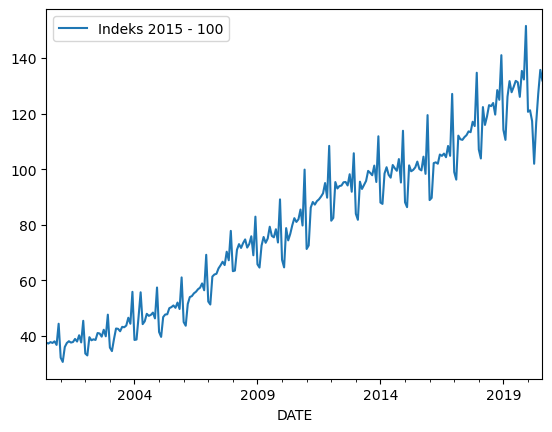

In [5]:
data.plot()

In [6]:
data_df = data.diff(periods = 1)

<Axes: xlabel='DATE'>

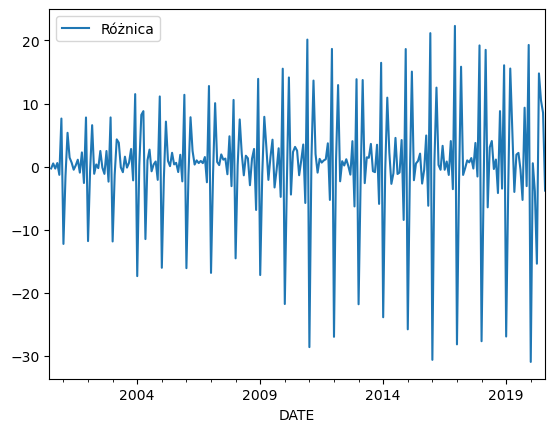

In [7]:
data_df.columns = ['Różnica']
data_df.plot()

In [11]:
#! conda install pmdarima
from pmdarima.arima import auto_arima

In [15]:
arima_model = auto_arima(data, start_p=0, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                        m=12, seasonal=True, error_action='warn', trace=True,
                        suppress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1348.990, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1191.081, Time=0.57 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1248.016, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1517.846, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1213.522, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1188.458, Time=1.47 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=1187.025, Time=1.88 sec
 ARIMA(1,0,0)(4,1,0)[12] intercept   : AIC=1177.701, Time=3.87 sec
 ARIMA(1,0,0)(5,1,0)[12] intercept   : AIC=1176.690, Time=5.13 sec
 ARIMA(1,0,0)(5,1,1)[12] intercept   : AIC=1178.003, Time=12.83 sec
 ARIMA(1,0,0)(4,1,1)[12] intercept   : AIC=1177.528, Time=5.86 sec
 ARIMA(0,0,0)(5,1,0)[12] intercept   : AIC=1341.549, Time=9.03 sec
 ARIMA(2,0,0)(5,1,0)[12] intercept   : AIC=1178.328, Time=5.97 sec
 ARIMA(1,0,1)(5,1,0)[12] intercept   : AIC=1178.104, Time=9.86 sec
 ARIMA(0,0,1)(5,1,

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
SARIMA_model = SARIMAX(data, order=(4,1,2), seasonal_order=(0,1,2,12))
SARIMA_model_fit = SARIMA_model.fit()
predictions = SARIMA_model_fit.forecast(steps=24, exog=None, alpha=0.05)
predictions

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2020-09-01    120.739746
2020-10-01    122.160562
2020-11-01    117.224386
2020-12-01    139.704973
2021-01-01    117.562008
2021-02-01    121.561398
2021-03-01    129.806542
2021-04-01    119.571347
2021-05-01    119.052382
2021-06-01    120.320612
2021-07-01    124.505712
2021-08-01    127.090130
2021-09-01    125.967091
2021-10-01    134.620132
2021-11-01    130.184217
2021-12-01    146.369458
2022-01-01    115.196038
2022-02-01    113.115044
2022-03-01    121.646787
2022-04-01    117.685538
2022-05-01    125.450843
2022-06-01    131.729871
2022-07-01    134.810470
2022-08-01    131.081733
Freq: MS, Name: predicted_mean, dtype: float64

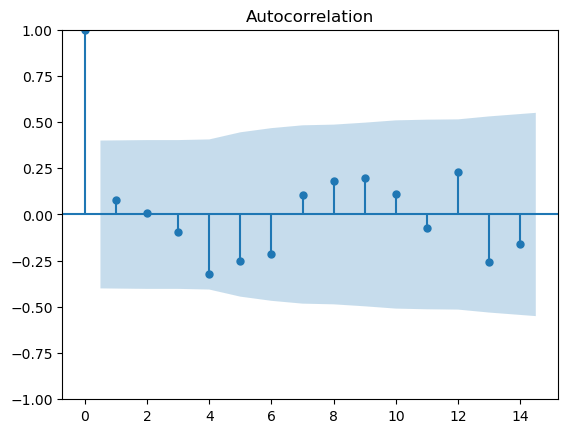

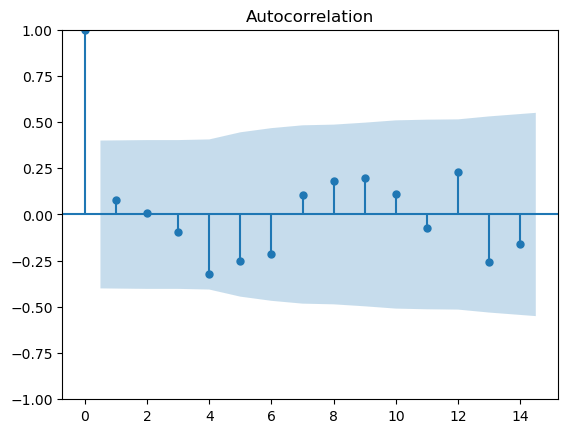

In [18]:
plot_acf(predictions)

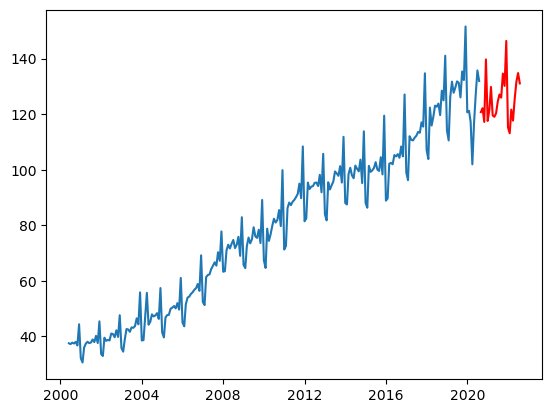

In [19]:
plt.plot(data)
plt.plot(predictions, color="red")